In [1]:
import os
import pickle
import matplotlib.pyplot as plt
import random
from PIL import Image
from mpl_toolkits.axes_grid1 import ImageGrid
from tensorflow.keras.preprocessing import image
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, \
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from keras.models import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [4]:
# diseases = os.listdir('data')

# filenames = []

# for disease in dataset:
#     for file in os.listdir(os.path.join('data',disease)):
#         filenames.append(os.path.join('data',disease,file))
    
# #print (filenames[3000:])
# pickle.dump(filenames,open('filenames.pkl','wb'))

In [5]:
our_folders = ['Acne', \
              'Eczema', \
              'Melanoma',\
              'Melasma',\
              'Psoriasis',
              'Rosacea',\
              'Shingles'\
              'Urticaria']

In [6]:
root_dir = 'data'

In [7]:
acne_path = os.path.join(root_dir,'Acne')
eczema_path = os.path.join(root_dir, 'Eczema')
melanoma_path = os.path.join(root_dir, 'Melanoma')
melasma_path = os.path.join(root_dir,'Melasma')
psoriasis_path = os.path.join(root_dir, 'Psoriasis')
rosacea_path = os.path.join(root_dir, 'Rosacea')
shingles_path = os.path.join(root_dir,'Shingles')
urticaria_path = os.path.join(root_dir, 'Urticaria')


In [8]:
acne_images=([files for _, _, files in os.walk(acne_path)])[0]
eczema_images=([files for _, _, files in os.walk(eczema_path)])[0]
melanoma_images=([files for _, _, files in os.walk(melanoma_path)])[0]
melasma_images=([files for _, _, files in os.walk(melasma_path)])[0]
psoriasis_images=([files for _, _, files in os.walk(psoriasis_path)])[0]
rosacea_images=([files for _, _, files in os.walk(rosacea_path)])[0]
shingles_images=([files for _, _, files in os.walk(shingles_path)])[0]
urticaria_images=([files for _, _, files in os.walk(urticaria_path)])[0]

In [9]:
len(rosacea_images)

383

In [10]:

def plotGridImages(disease_name, list_files, path, ncols=5):
    # for folder_name in our_folders:
    fig = plt.figure(1, figsize=(30, 30))
    grid = ImageGrid(fig, 111, nrows_ncols=(1, ncols), axes_pad=0.05)
    print(f"{disease_name}")
    for i, img_id in enumerate(random.sample(list_files,ncols)):
        ax = grid[i]
        image_dir_path = os.path.join(path, img_id)
        img = image.load_img(image_dir_path, )
        img= img.resize((250,250))
        img = image.img_to_array(img )
        
        ax.imshow(img/255.)
        ax.text(50, 100, 'LABEL: %s' % disease_name, color='k', backgroundcolor='w',\
        alpha=0.8 , fontweight='bold')
        ax.axis('off')
    # plt.tight_layout()
    plt.show()

Acne


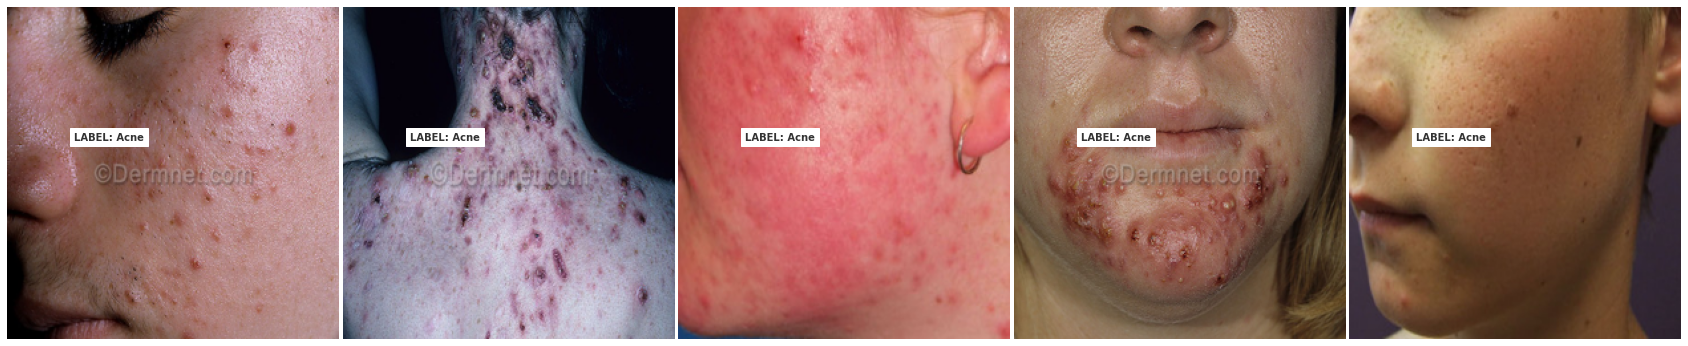

In [11]:
plotGridImages('Acne',acne_images, acne_path)

eczema


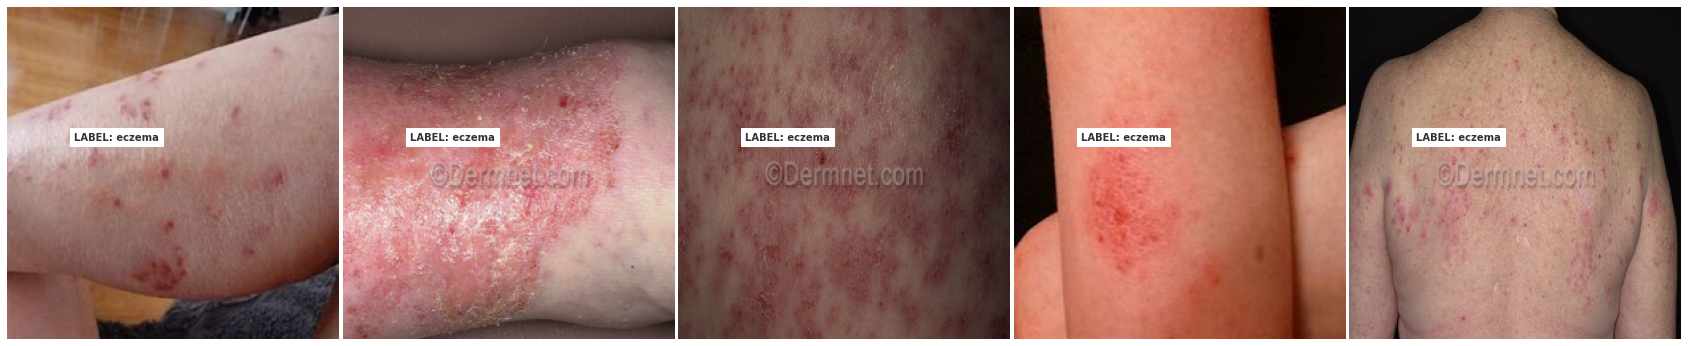

In [12]:
plotGridImages('eczema',eczema_images, eczema_path)

melanoma


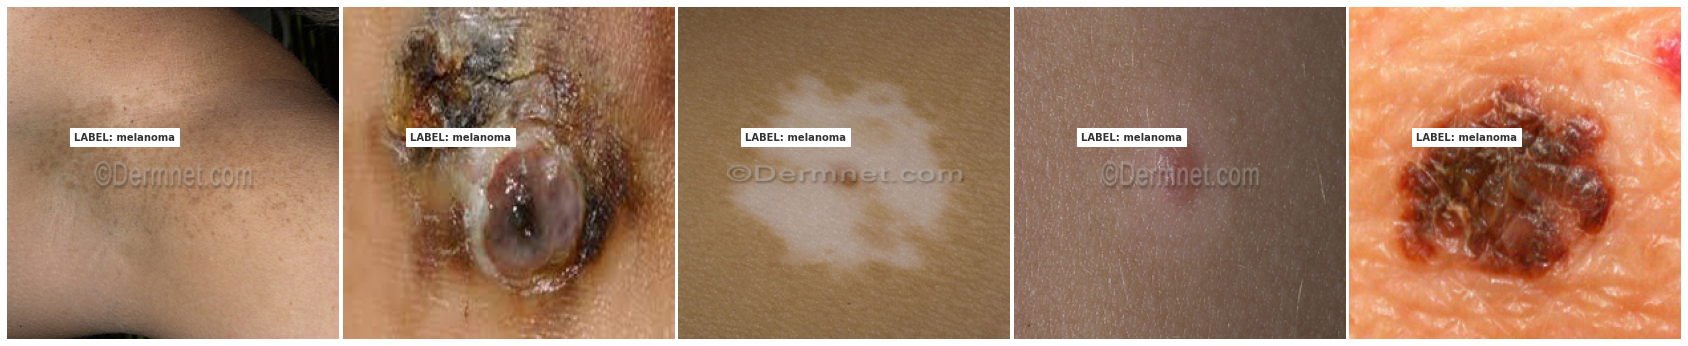

In [13]:
plotGridImages('melanoma',melanoma_images, melanoma_path)

melasma


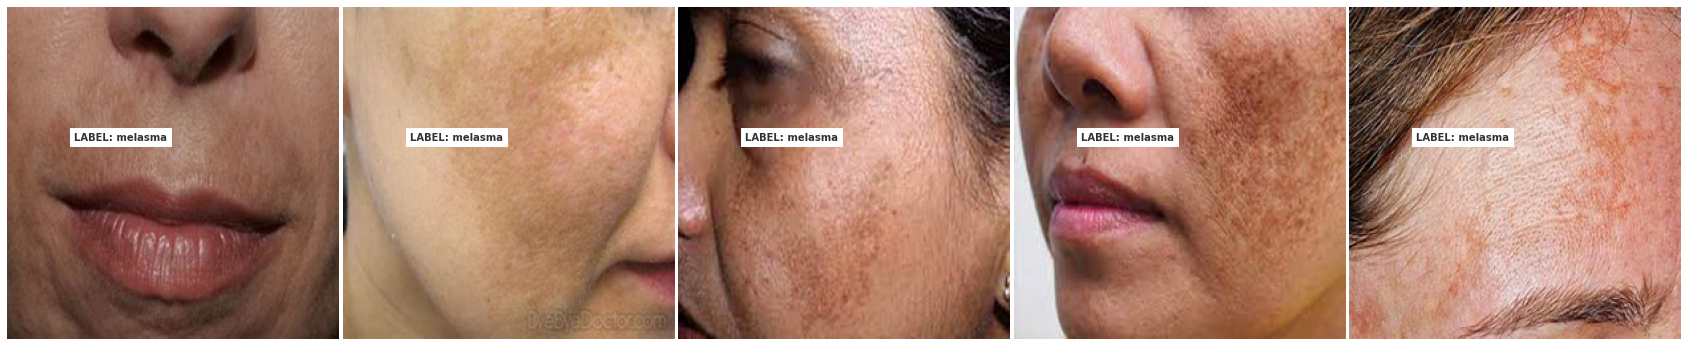

In [14]:
plotGridImages('melasma',melasma_images, melasma_path)

psoriasis


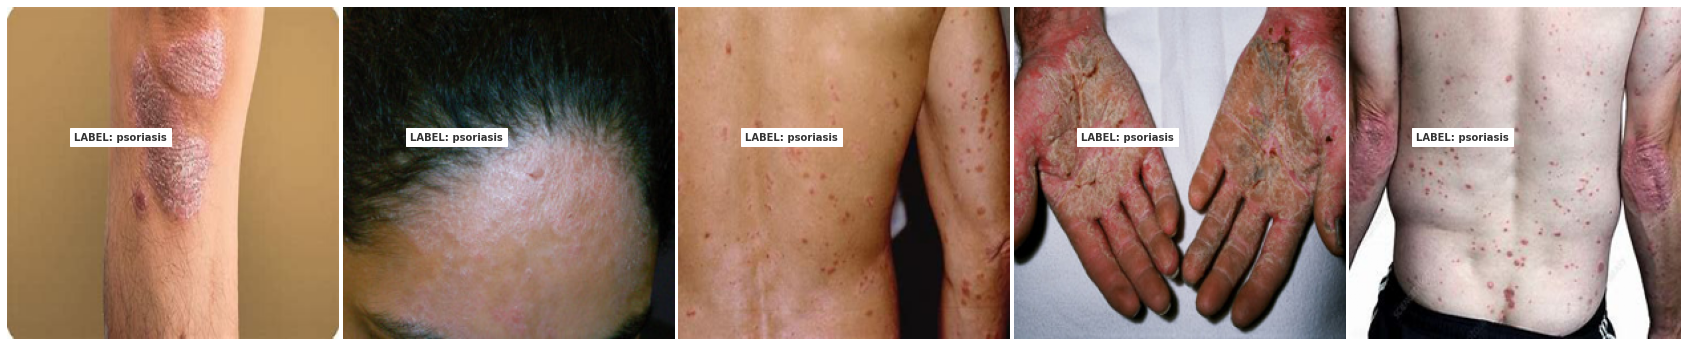

In [15]:
plotGridImages('psoriasis',psoriasis_images, psoriasis_path)

rosacea


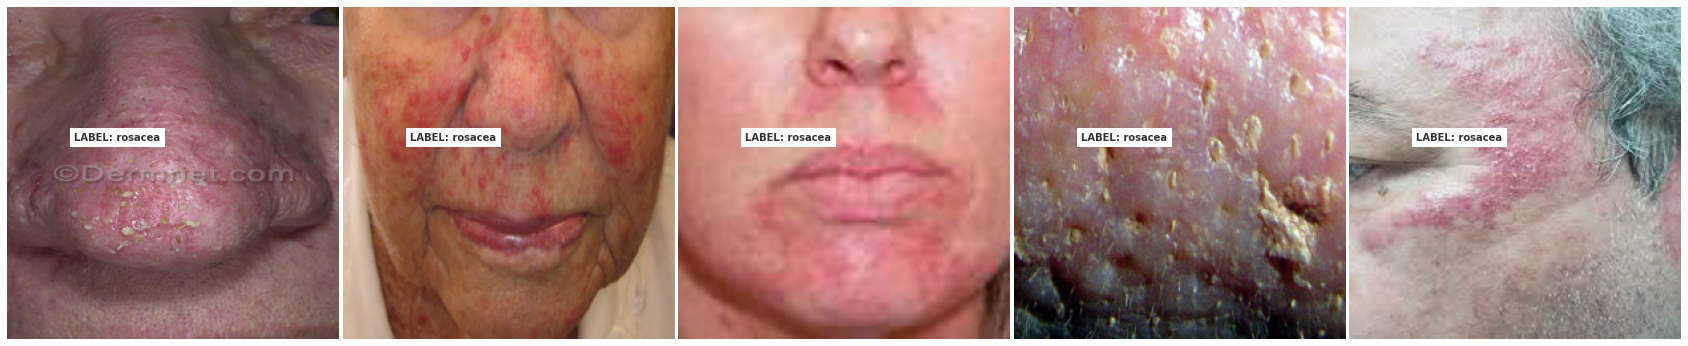

In [16]:
plotGridImages('rosacea',rosacea_images, rosacea_path)

shingles


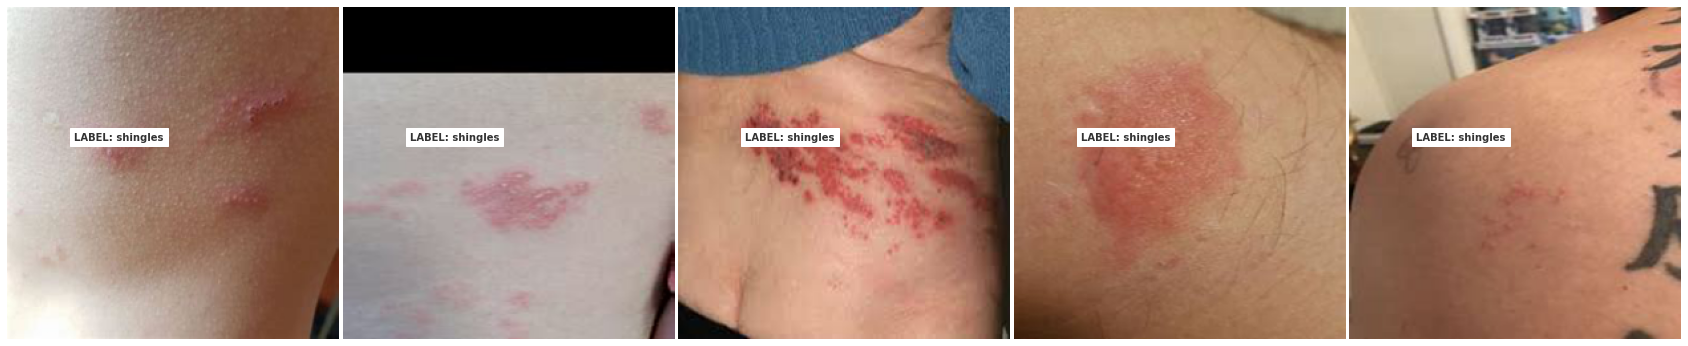

In [17]:
plotGridImages('shingles',shingles_images, shingles_path)

urticaria


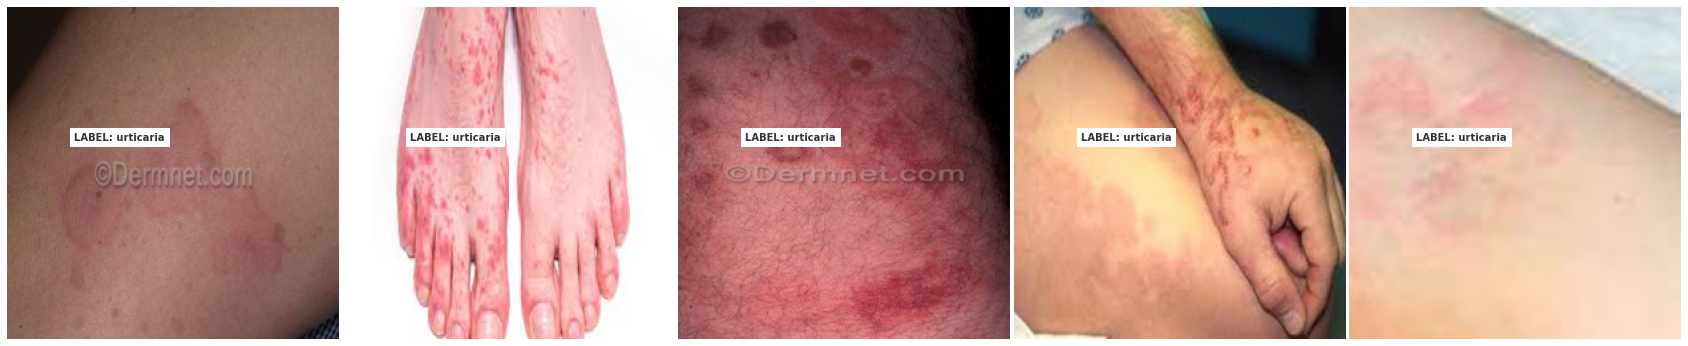

In [18]:
plotGridImages('urticaria',urticaria_images, urticaria_path)

### Putting all images and their assinged labels into a Dataframe

In [19]:
diseases = os.listdir('data')

image_list =[]
label_list=[]

for disease in diseases:
    for img in os.listdir(os.path.join('data',disease)):
        image_list.append(os.path.join('data',disease,img))
        label_list.append(disease)
        
    
#print (filenames[3000:])
#pickle.dump(filenames,open('filenames.pkl','wb'))

In [20]:
len(image_list), len(label_list)

(3390, 3390)

In [21]:
df=pd.DataFrame()

In [22]:
df['Image']=pd.DataFrame(image_list)
df['Label']=pd.DataFrame(label_list)

In [23]:
df.shape

(3390, 2)

In [24]:
df

Image      Label
0                data\Acne\Acne (1).jpeg       Acne
1                 data\Acne\Acne (1).jpg       Acne
2               data\Acne\Acne (10).jpeg       Acne
3                data\Acne\Acne (10).jpg       Acne
4               data\Acne\Acne (100).jpg       Acne
...                                  ...        ...
3385   data\Urticaria\Urticaria (97).jpg  Urticaria
3386  data\Urticaria\Urticaria (98).jpeg  Urticaria
3387   data\Urticaria\Urticaria (98).jpg  Urticaria
3388  data\Urticaria\Urticaria (99).jpeg  Urticaria
3389   data\Urticaria\Urticaria (99).jpg  Urticaria

[3390 rows x 2 columns]

In [25]:
#df.to_csv("df.csv",index=False)

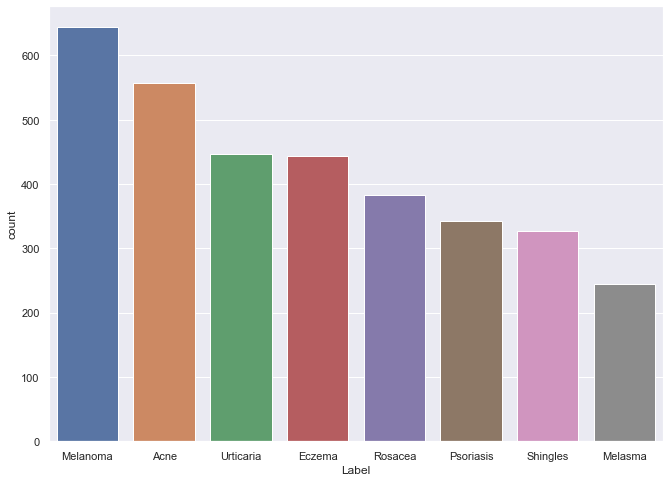

In [26]:
sns.set(rc={'figure.figsize':(11,8)})
ax = sns.countplot(x=df['Label'],
                   order=df['Label'].value_counts(ascending=False).index);



In [27]:
from sklearn.model_selection import train_test_split
train_df,test_df = train_test_split(df, stratify=df['Label'],test_size=0.25, random_state=42)  


In [28]:
train_df['Label'].value_counts()

Melanoma     483
Acne         418
Urticaria    335
Eczema       333
Rosacea      287
Psoriasis    257
Shingles     245
Melasma      184
Name: Label, dtype: int64

In [29]:
test_df['Label'].value_counts()

Melanoma     161
Acne         139
Urticaria    112
Eczema       111
Rosacea       96
Psoriasis     86
Shingles      82
Melasma       61
Name: Label, dtype: int64

In [30]:
train_data_gen  = ImageDataGenerator(
                                    rescale=1 / 255.0,
                                    rotation_range=30,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip = True,
                                    vertical_flip = True,
                                    zoom_range=0.3,
                                    validation_split=0.2,
                                    fill_mode='nearest')
test_data_gen = ImageDataGenerator(rescale=1 / 255.0)

In [31]:
batch_size = 16
train_generator = train_data_gen.flow_from_dataframe(
    dataframe=train_df,
    x_col="Image",
    y_col="Label",
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42
)
valid_generator = train_data_gen.flow_from_dataframe(
    dataframe=train_df,
    x_col="Image",
    y_col="Label",
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode="categorical", 
    subset='validation',
    shuffle=True,
    seed=42 
)
test_generator = test_data_gen.flow_from_dataframe(
    dataframe=test_df,
    x_col="Image",
    y_col="Label",
    target_size=(299, 299),
    batch_size=1,
    class_mode='categorical',
    shuffle=False,
    
)

Found 2034 validated image filenames belonging to 8 classes.
Found 508 validated image filenames belonging to 8 classes.
Found 848 validated image filenames belonging to 8 classes.


In [32]:
from keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(input_shape=(299, 299, 3),  # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [33]:
for layer in base_model.layers:
    #print(layer.name)
    layer.trainable = False
    
print(len(base_model.layers))

311


In [34]:
base_model.output_shape

(None, 8, 8, 2048)

In [35]:
# Flatten the output layer to 1 dimension
x = layers.GlobalAveragePooling2D()(base_model.output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.7
x = layers.Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(8, activation='softmax')(x)

# Configure and compile the model

model = Model(base_model.input, x)
#optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['categorical_accuracy'])


model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 35, 35, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 17, 17, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 17, 17, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 17, 17, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 17, 17, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 17, 17, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 17, 17, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 8, 8, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 8, 8, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 8, 8, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [36]:
# custom_early_stopping = EarlyStopping(
#     monitor='val_loss', 
#     patience=3, 
#     min_delta=0.01, 
#     mode='min'
# )
filepath="C:/Users/mansi/Desktop/Study/Skin_Disease/best_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.1, 
                                            min_lr=0.000001, cooldown=2)

In [37]:
history = model.fit(train_generator,
                    epochs=50, 
                    validation_data=valid_generator,
                   callbacks=[learning_rate_reduction,checkpoint],
                  )

Epoch 1/50
128/128 [==============================] - ETA: 0s - loss: 1.7194 - categorical_accuracy: 0.4036
Epoch 1: val_loss improved from inf to 1.29016, saving model to C:/Users/mansi/Desktop/Study/Skin_Disease\best_weights.hdf5
128/128 [==============================] - 319s 2s/step - loss: 1.7194 - categorical_accuracy: 0.4036 - val_loss: 1.2902 - val_categorical_accuracy: 0.5591 - lr: 0.0010
Epoch 2/50
128/128 [==============================] - ETA: 0s - loss: 1.3166 - categorical_accuracy: 0.5295
Epoch 2: val_loss improved from 1.29016 to 1.22551, saving model to C:/Users/mansi/Desktop/Study/Skin_Disease\best_weights.hdf5
128/128 [==============================] - 332s 3s/step - loss: 1.3166 - categorical_accuracy: 0.5295 - val_loss: 1.2255 - val_categorical_accuracy: 0.5551 - lr: 0.0010
Epoch 3/50
128/128 [==============================] - ETA: 0s - loss: 1.2663 - categorical_accuracy: 0.5403
Epoch 3: val_loss did not improve from 1.22551
128/128 [==============================

128/128 [==============================] - 337s 3s/step - loss: 0.8513 - categorical_accuracy: 0.6957 - val_loss: 0.9913 - val_categorical_accuracy: 0.6673 - lr: 1.0000e-06
Epoch 24/50
128/128 [==============================] - ETA: 0s - loss: 0.8341 - categorical_accuracy: 0.7104
Epoch 24: val_loss did not improve from 0.96676
128/128 [==============================] - 335s 3s/step - loss: 0.8341 - categorical_accuracy: 0.7104 - val_loss: 1.0272 - val_categorical_accuracy: 0.6240 - lr: 1.0000e-06
Epoch 25/50
128/128 [==============================] - ETA: 0s - loss: 0.8555 - categorical_accuracy: 0.6957
Epoch 25: val_loss did not improve from 0.96676
128/128 [==============================] - 329s 3s/step - loss: 0.8555 - categorical_accuracy: 0.6957 - val_loss: 1.0295 - val_categorical_accuracy: 0.6260 - lr: 1.0000e-06
Epoch 26/50
128/128 [==============================] - ETA: 0s - loss: 0.8511 - categorical_accuracy: 0.6912
Epoch 26: ReduceLROnPlateau reducing learning rate to 1e-0

128/128 [==============================] - ETA: 0s - loss: 0.8617 - categorical_accuracy: 0.6952
Epoch 48: val_loss did not improve from 0.96676
128/128 [==============================] - 342s 3s/step - loss: 0.8617 - categorical_accuracy: 0.6952 - val_loss: 0.9896 - val_categorical_accuracy: 0.6535 - lr: 1.0000e-06
Epoch 49/50
128/128 [==============================] - ETA: 0s - loss: 0.8292 - categorical_accuracy: 0.7080
Epoch 49: val_loss did not improve from 0.96676
128/128 [==============================] - 340s 3s/step - loss: 0.8292 - categorical_accuracy: 0.7080 - val_loss: 1.0749 - val_categorical_accuracy: 0.6220 - lr: 1.0000e-06
Epoch 50/50
128/128 [==============================] - ETA: 0s - loss: 0.8302 - categorical_accuracy: 0.7085
Epoch 50: val_loss did not improve from 0.96676
128/128 [==============================] - 341s 3s/step - loss: 0.8302 - categorical_accuracy: 0.7085 - val_loss: 0.9852 - val_categorical_accuracy: 0.6634 - lr: 1.0000e-06


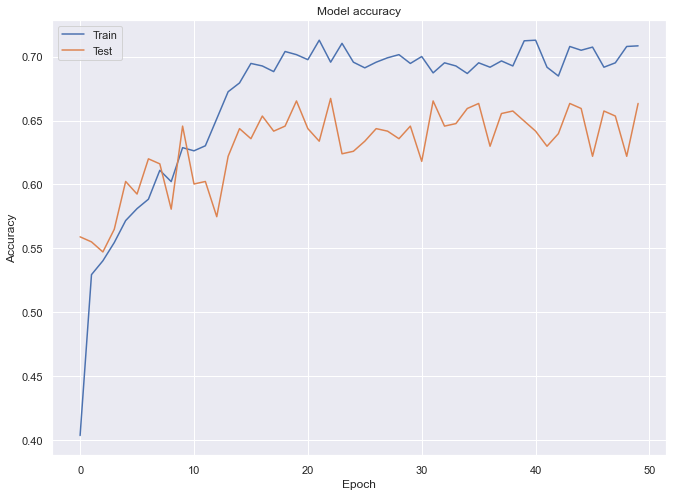

In [38]:
#plot accuracy vs epoch
plt.plot(history.history['categorical_accuracy']) 
plt.plot(history.history['val_categorical_accuracy']) 
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

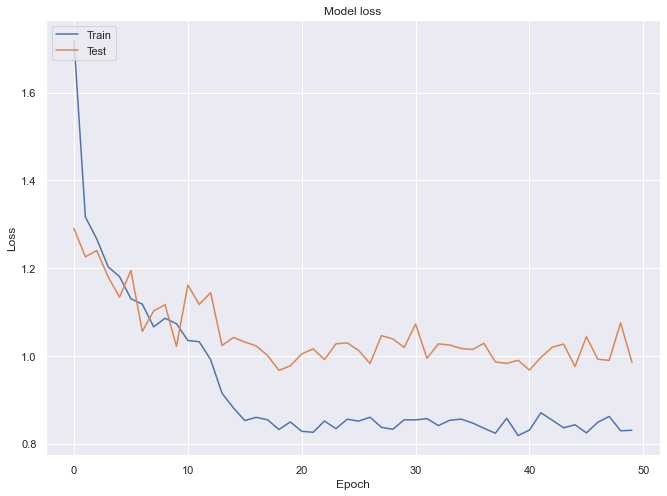

In [39]:
# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [40]:
test_true=test_generator.classes
test_pred_raw = model.predict(test_generator)
test_pred = np.argmax(test_pred_raw, axis=1)



848/848 [==============================] - 163s 188ms/step


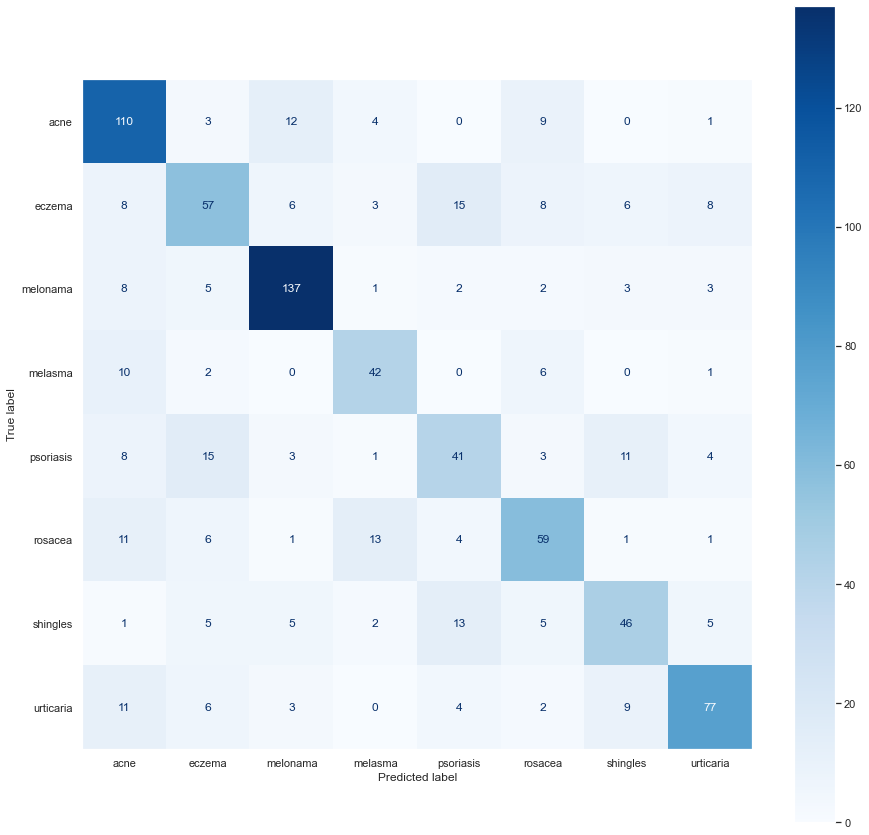

In [41]:
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, accuracy_score)

cm = confusion_matrix(test_true, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['acne','eczema','melonama','melasma','psoriasis','rosacea', 'shingles','urticaria'])
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

In [42]:
result = model.evaluate(test_generator,batch_size=32)
print("test_loss, test accuracy",result)

848/848 [==============================] - 158s 186ms/step - loss: 0.9640 - categorical_accuracy: 0.6710
test_loss, test accuracy [0.9640231728553772, 0.6709905862808228]


In [45]:
acc = accuracy_score(test_true, test_pred)
print("InceptionV3 Model Accuracy: {:.2f}%".format(acc * 100))

InceptionV3 Model Accuracy: 67.10%


In [44]:
from keras.models import load_model
model.save("InceptionV3.h5")